# 왓슨 인공지능 중간고사 코딩 테스트 문제
## 문제 0 : 여러분의 이름을 입력하십시오
### your_name_here

###Q1. 다음 신경망 다이어그램을 보고 이를 구현하기 위한 코드를 Keras를 사용하여 밑의 셀에 완성하시오(15점)

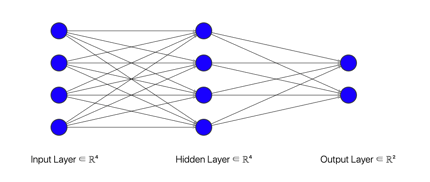

In [ ]:
! wget --quiet --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jGQthuWngRlgUq7masWosTq1LyzwUAS7' -O 퍼셉트론.png
from IPython.display import Image
Image("퍼셉트론.png", width=500)  

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
num_classes = 4
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


##Q2. 아래  코드가 출력하는 Training and validation loss 그래프에서 validation loss 값이 모든 epoch 구간에서 training loss 값보다 작도록  코드를 수정하시오. 현재의 코드는 validation loss가 크게 발생하므로 코드 최적화가 필요합니다.(15점)

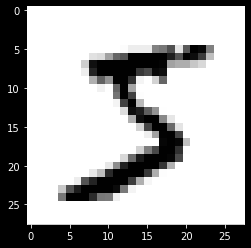

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_125 (Dense)            (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_126 (Dense)            (None, 10)                1290      
_________________________________________________________________
activation_6 (Activation)    (None, 10)              

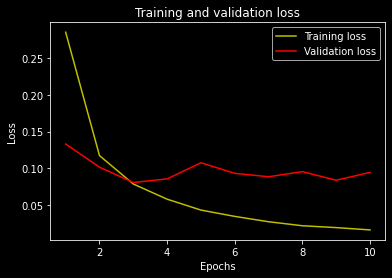

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import normalize, to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Q3. Tensorflow로 선형 회귀분석 하기(15점)


In [ ]:
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
warnings.filterwarnings(action='ignore')

In [ ]:
# 데이터 파일을 다운로드해서 내용을 살펴봅니다.
! wget --quiet --no-check 'https://docs.google.com/uc?export=download&id=1gsX2R_WJIyLB6t2PO63OzvwjGdPniXyv' -O offences.csv
df = pd.read_csv('offences.csv')
df.head()

,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,Unnamed: 13
0,Abernathy,2821.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,12.0,0.0,0.0,1.0,NaN
1,Abilene,119401.0,477.0,1.0,NaN,37.0,125.0,314.0,4769.0,1055.0,3460.0,254.0,16.0,NaN
2,Addison,15961.0,51.0,1.0,NaN,4.0,11.0,35.0,784.0,129.0,593.0,62.0,1.0,NaN
3,Alamo,18876.0,164.0,0.0,NaN,11.0,27.0,126.0,1336.0,203.0,1052.0,81.0,1.0,NaN
4,Alamo Heights,7443.0,9.0,0.0,NaN,2.0,2.0,5.0,235.0,36.0,194.0,5.0,0.0,NaN


### Q3-1. 위의 데이터프레임을 아래 그림과 같이 정리하십시오. 이때 컬럼 Burglary =  Burlaries 로 이름 바꾸고, 컬럼  Murder and\nnonnegligent\nmanslaughter = Manslaughter로 바꾸어주십시오.(3점)

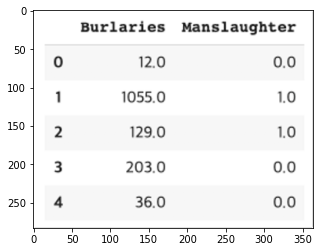

In [ ]:
! wget --quiet --no-check 'https://docs.google.com/uc?export=download&id=1QKWl-dIZvjG7KkWhOIpUAAxTBxQ4L_sJ' -O df.png
img = mpimg.imread('df.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# your code here


,Burlaries,Manslaughter
0,12.0,0.0
1,1055.0,1.0
2,129.0,1.0
3,203.0,0.0
4,36.0,0.0


In [ ]:
# 제대로 변경되었는지 데이터프레임의 내용을 확인합니다.
df.head()

In [ ]:
# NaN이 있는지 확인합니다.
df.isnull().sum()

Burlaries       0
Manslaughter    0
dtype: int64

### Q3-2. Pandas의 dropna()를 사용하여 NaN이 있는 row들을 삭제하고 그 결과를 원래의 df 오브젝트로 저장하십시오. (3점)
### 참조: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [ ]:
# your code here


In [ ]:
# 제대로 정제되었는지 확인합니다.
df.isnull().sum()

Burlaries       0
Manslaughter    0
dtype: int64

In [ ]:
# learn rate와 epoch의 값을 지정합니다.
learningRate = 0.0000001
numEpochs = 15

In [ ]:
# 텐서들을 초기화합니다.
x = tf.placeholder(tf.float32, shape=(None, ))
y = tf.placeholder(tf.float32, shape=(None, ))
w = tf.Variable(tf.zeros(shape=[1]))
b = tf.Variable(tf.zeros(shape=[1]))

### Q3-3. 아래 셀 중에 your code here 부분을 완성하십시오.(9점)

In [ ]:
# Predictor변수를 y_pred로 이름짓고 y_pred = x * W + b 텐서 연산을 정의하십시오
y_pred = "your code here"


# loss 함수를 최소자승법을 사용하여 정의하십시오. y와 y_pred의 차이의 제곱을 사용
loss = tf.reduce_mean("your code here")


# optimizer를 기본 경사하강법을 사용하여 정의하십시오.
optimiser = tf.train.GradientDescentOptimizer("your code here").minimize("your code here")


with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    input, output = df.iloc[:, 0], df.iloc[:, 1]
    for epoch in range(numEpochs):
        _, sampleLoss, pred = session.run([optimiser, loss, y_pred], {x: input, y: output})
        print("EPOCH:", epoch + 1)
        print("LOSS: ", sampleLoss)
        print("")

    y_preds = session.run(y_pred, {x: input, y: output})

EPOCH: 1
LOSS:  126.39901

EPOCH: 2
LOSS:  53.221455

EPOCH: 3
LOSS:  25.892776

EPOCH: 4
LOSS:  15.68668

EPOCH: 5
LOSS:  11.875143

EPOCH: 6
LOSS:  10.451697

EPOCH: 7
LOSS:  9.920099

EPOCH: 8
LOSS:  9.721572

EPOCH: 9
LOSS:  9.6474285

EPOCH: 10
LOSS:  9.61974

EPOCH: 11
LOSS:  9.609399

EPOCH: 12
LOSS:  9.605538

EPOCH: 13
LOSS:  9.604097

EPOCH: 14
LOSS:  9.6035595

EPOCH: 15
LOSS:  9.603355



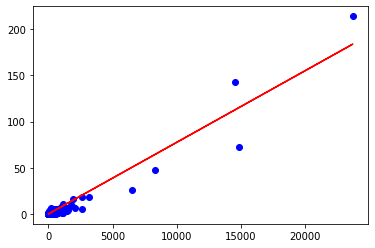

In [ ]:
# 결과를 그래프로 출력하여 확인합니다.
for i in range(df.shape[0]):
    x, y = df.iloc[i, 0], df.iloc[i, 1]
    plt.scatter(x, y, c='b')

plt.plot(input, y_preds, c='r')

plt.show()

# 코딩 테스트를 완료하였습니다!
# 이 파일을 LMS 과제  "중간고사 코딩테스트"에 midterm_(yourName).ipynb 파일로 제출해주십시오.
# 수고하였습니다!